## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [25]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [3]:
customer_set = pd.read_csv('Mall_Customers.csv')

customer_set = customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'})

**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [5]:
print("Attributes in the dataset: ", customer_set.columns)

print("Dimensions of the dataset: ", customer_set.shape)

print("Statistic of the dataset: ")
print(customer_set.describe())
print("-----------------------------------")
print("Number of NaNs: ")
print(customer_set.isnull().sum())

Attributes in the dataset:  Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')
Dimensions of the dataset:  (200, 5)
Statistic of the dataset: 
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000
-----------------------------------
Number of NaNs: 
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [6]:
customer_set = customer_set.drop(['CustomerID'], axis=1)

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

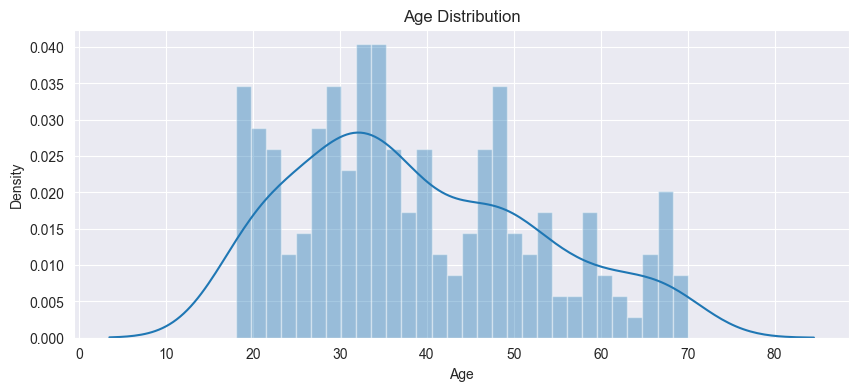

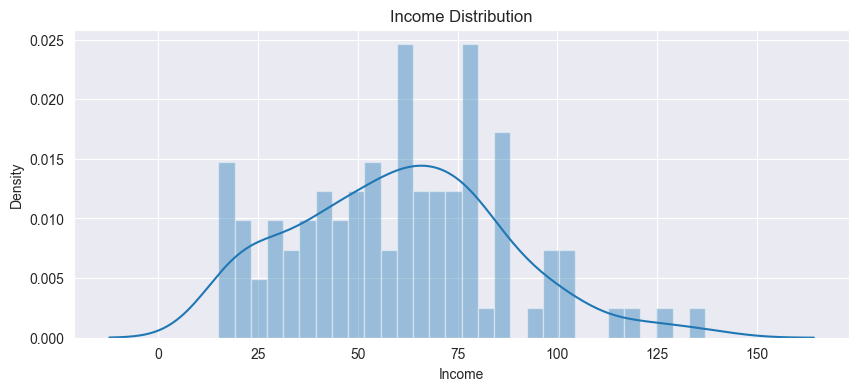

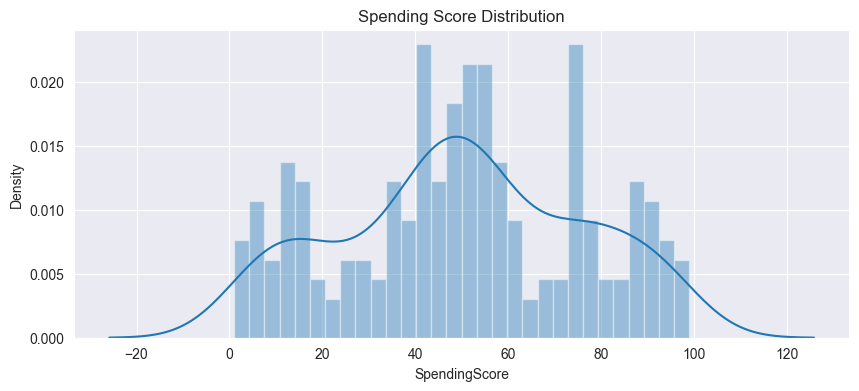

In [8]:
plt.figure(figsize=(10,4))
sns.distplot(customer_set['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(customer_set['Income'], bins=30)
plt.title('Income Distribution')
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(customer_set['SpendingScore'], bins=30)
plt.title('Spending Score Distribution')
plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

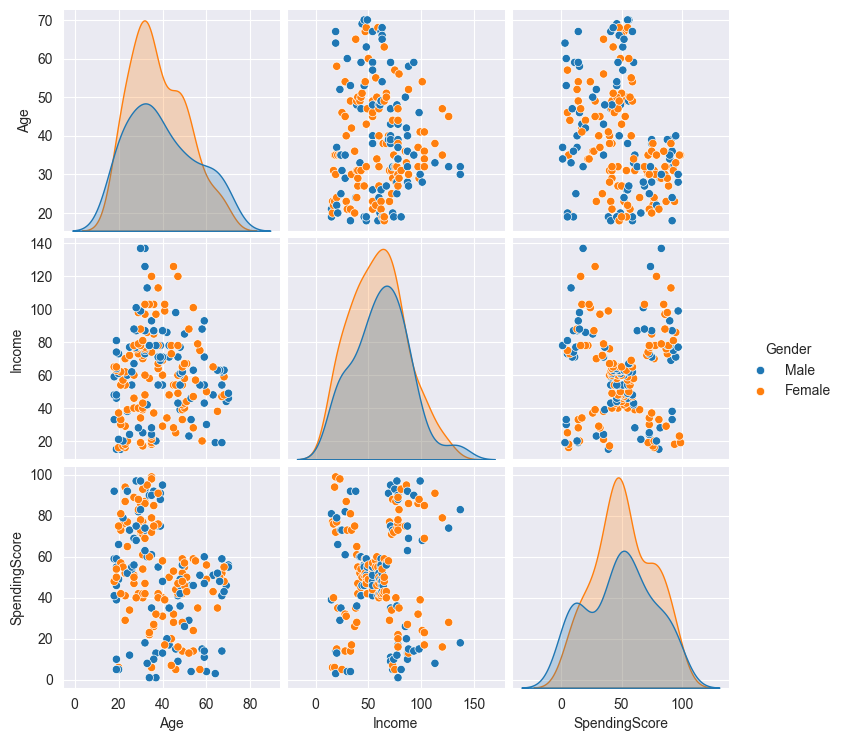

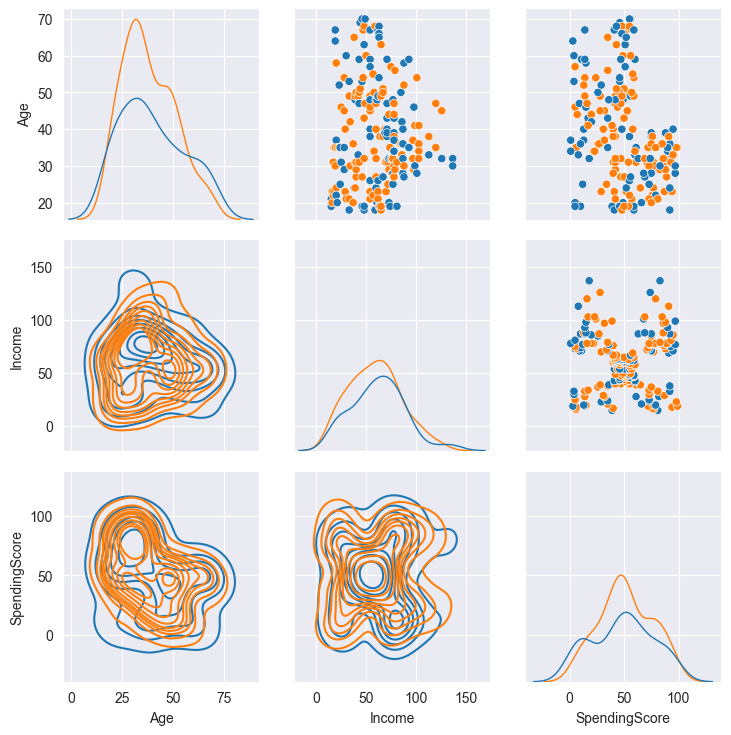

In [11]:
sns.pairplot(customer_set, hue='Gender')

g = sns.PairGrid(customer_set, hue='Gender')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=1)
g.map_lower(sns.kdeplot)

**Висновки з 1-4 завдання (детальні)**

1.   
2.   
3. ...

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender
Female    0.56
Male      0.44
Name: count, dtype: float64


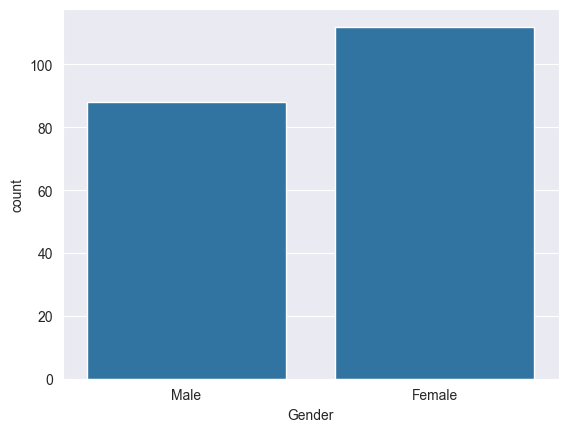

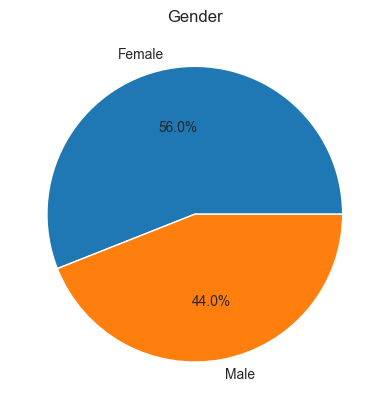

In [12]:
gender_ratio = customer_set['Gender'].value_counts() / len(customer_set)
print(gender_ratio)

sns.countplot(x='Gender', data=customer_set)
plt.show()

plt.pie(customer_set['Gender'].value_counts(), labels=customer_set['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender')
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

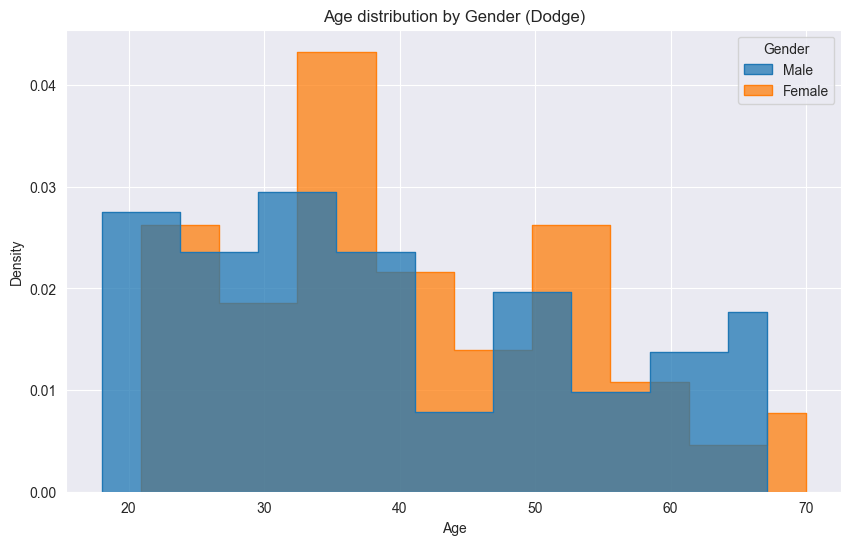

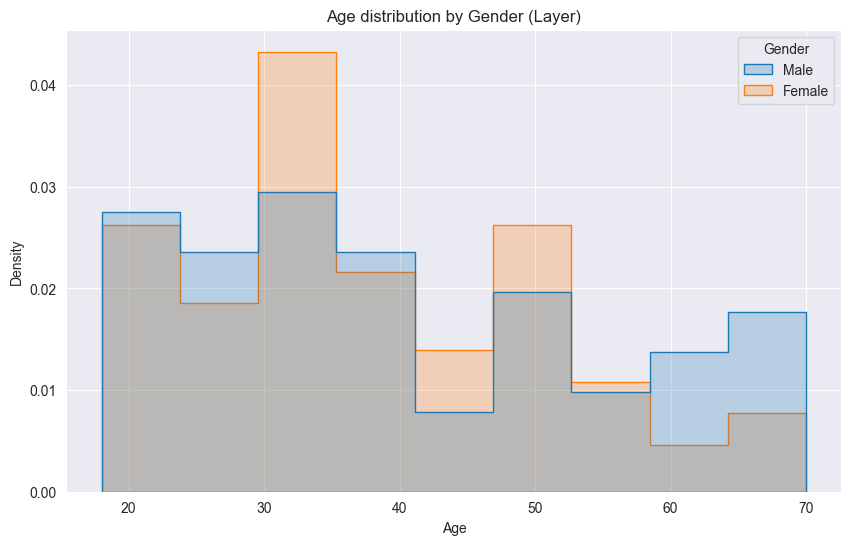

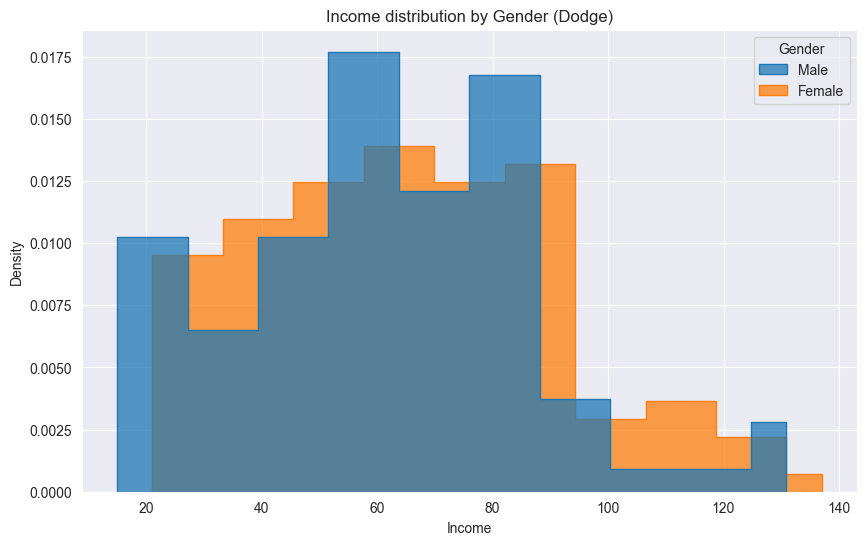

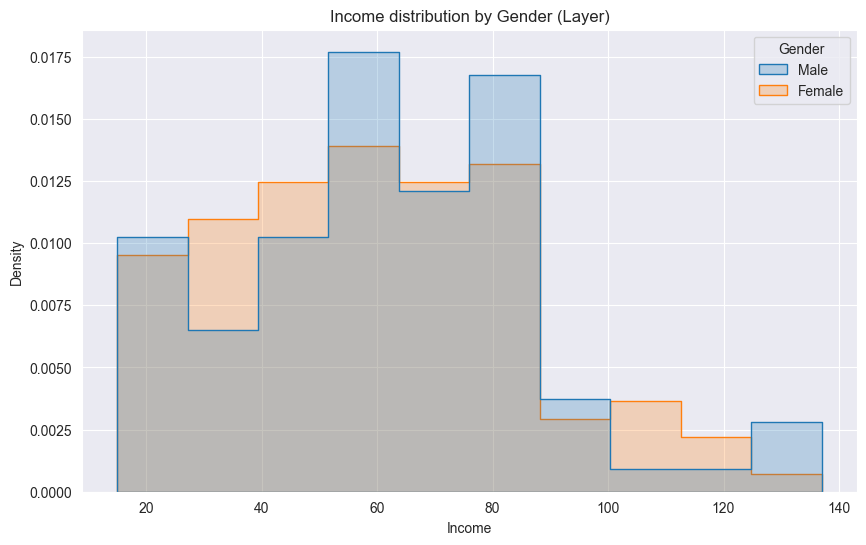

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=customer_set, x='Age', hue='Gender', element='step', stat='density', common_norm=False, multiple='dodge')
plt.title('Age distribution by Gender (Dodge)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=customer_set, x='Age', hue='Gender', element='step', stat='density', common_norm=False, multiple='layer')
plt.title('Age distribution by Gender (Layer)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=customer_set, x='Income', hue='Gender', element='step', stat='density', common_norm=False, multiple='dodge')
plt.title('Income distribution by Gender (Dodge)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=customer_set, x='Income', hue='Gender', element='step', stat='density', common_norm=False, multiple='layer')
plt.title('Income distribution by Gender (Layer)')
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



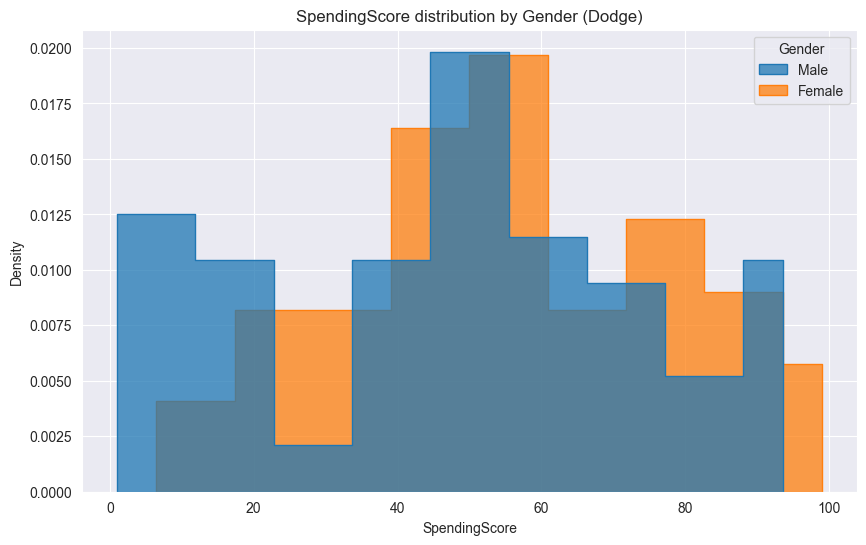

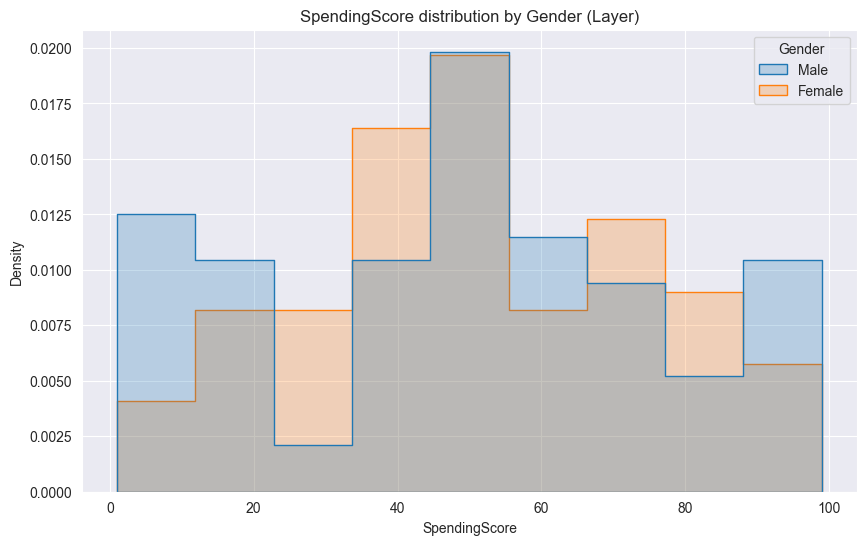

In [16]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', element='step', stat='density', common_norm=False, multiple='dodge')
plt.title('SpendingScore distribution by Gender (Dodge)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', element='step', stat='density', common_norm=False, multiple='layer')
plt.title('SpendingScore distribution by Gender (Layer)')
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

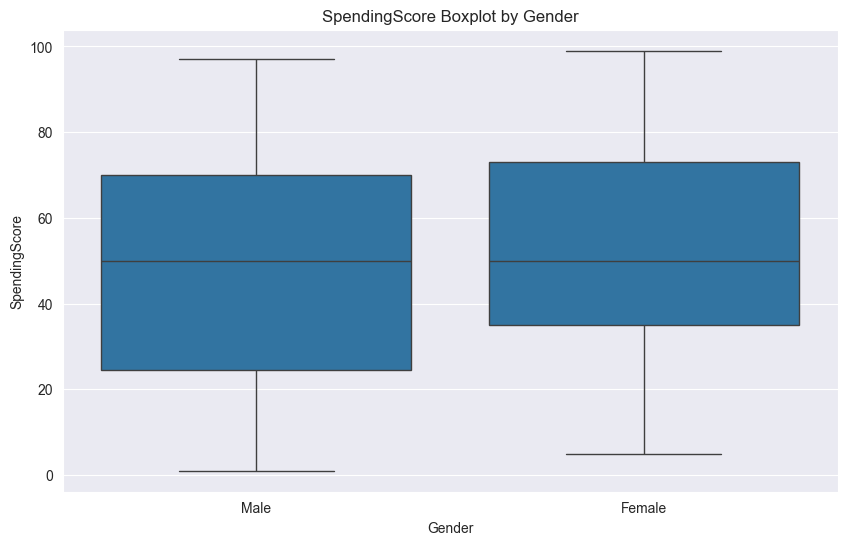

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set)
plt.title('SpendingScore Boxplot by Gender')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? 
3. Чи є різниця між витратами у чоловіків та жінок?
4. ...

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

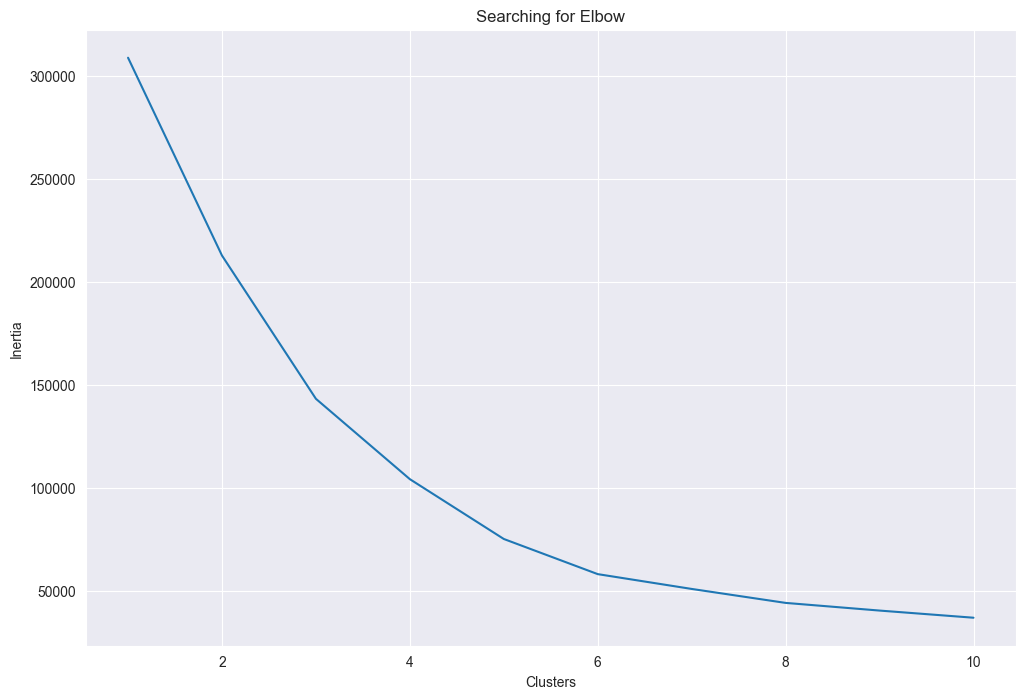

In [18]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

**Висновки з завдання 9 (детальні)** 

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
2.   
3. ...

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

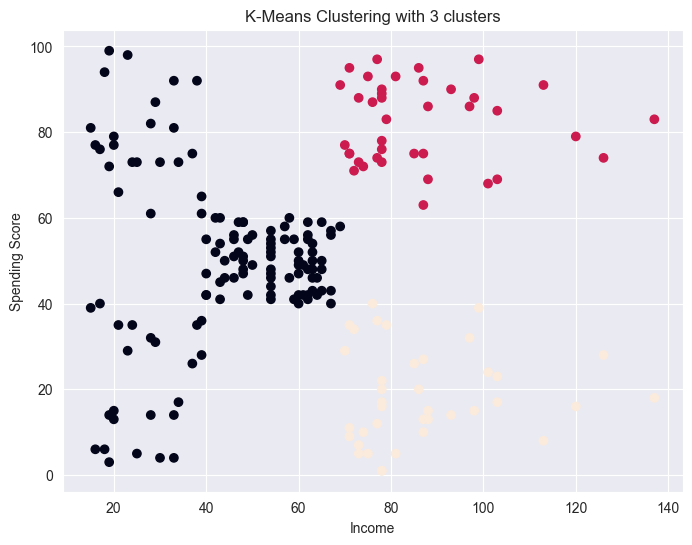

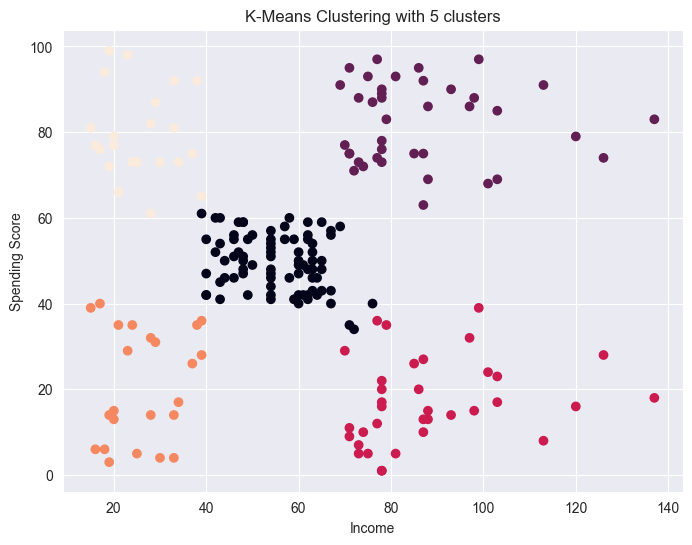

In [19]:
n_clusters = [3, 5]

X = customer_set[['Income', 'SpendingScore']]

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    
    y_pred = kmeans.predict(X)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X['Income'], X['SpendingScore'], c=y_pred)
    plt.title(f'K-Means Clustering with {n} clusters')
    plt.xlabel('Income')
    plt.ylabel('Spending Score')
    plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [27]:
n_clusters = [3, 5]

X = customer_set[['Income', 'SpendingScore', 'Age']]

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    labels = kmeans.labels_

    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=X['Income'],
        y=X['SpendingScore'],
        z=X['Age'],
        mode='markers',
        marker=dict(
            color=labels,
            colorscale='Viridis',
            opacity=0.8
        )
    )])

    fig.update_layout(title=f'3D Scatter plot for KMeans with {n} clusters',
                      scene=dict(xaxis_title='Income',
                                 yaxis_title='Spending Score',
                                 zaxis_title='Age'))

    # Show the plot
    fig.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
2.   
3. ...

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


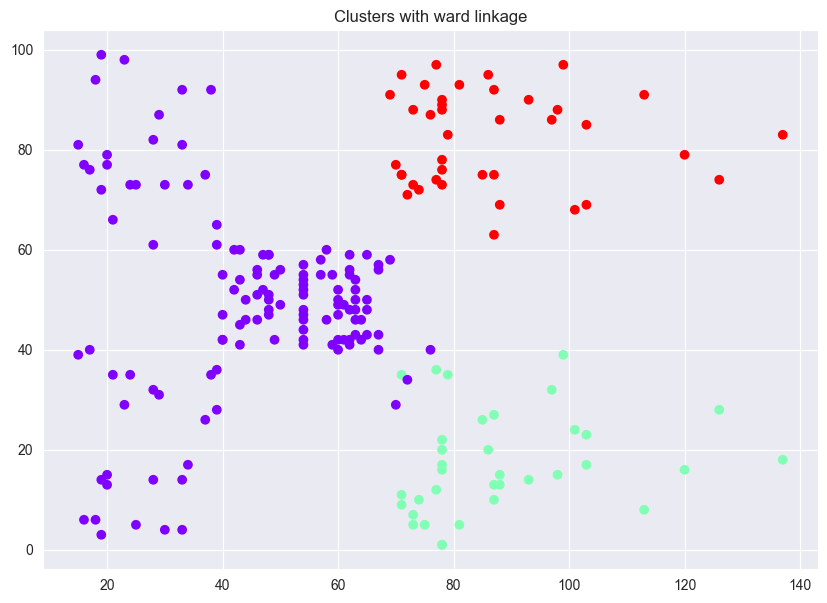

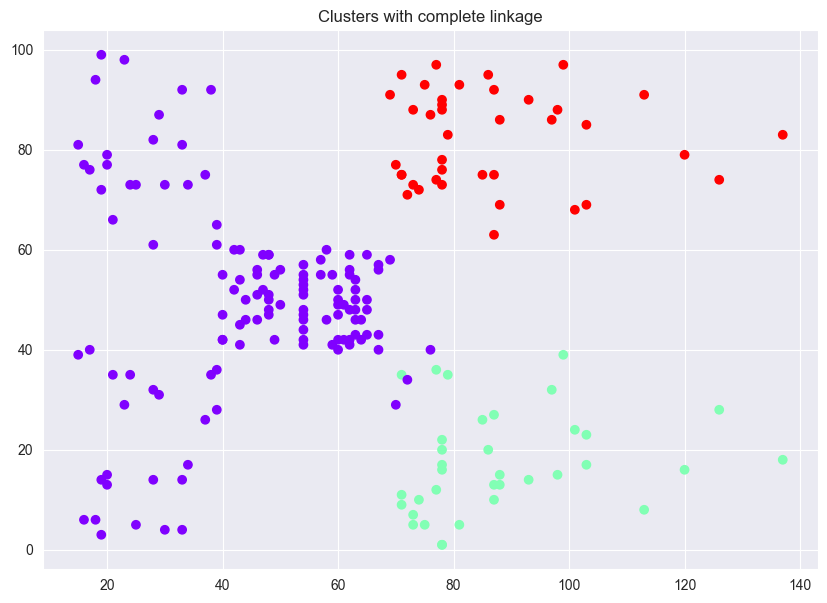

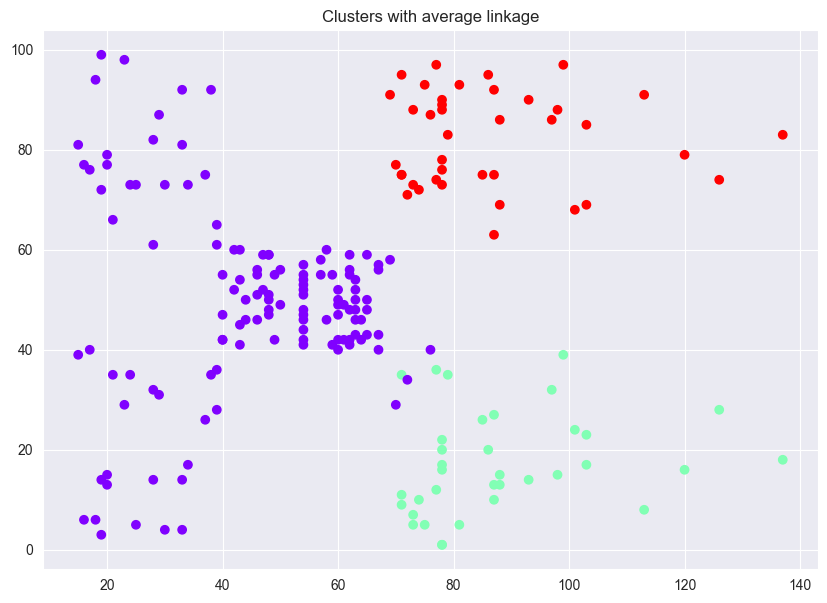

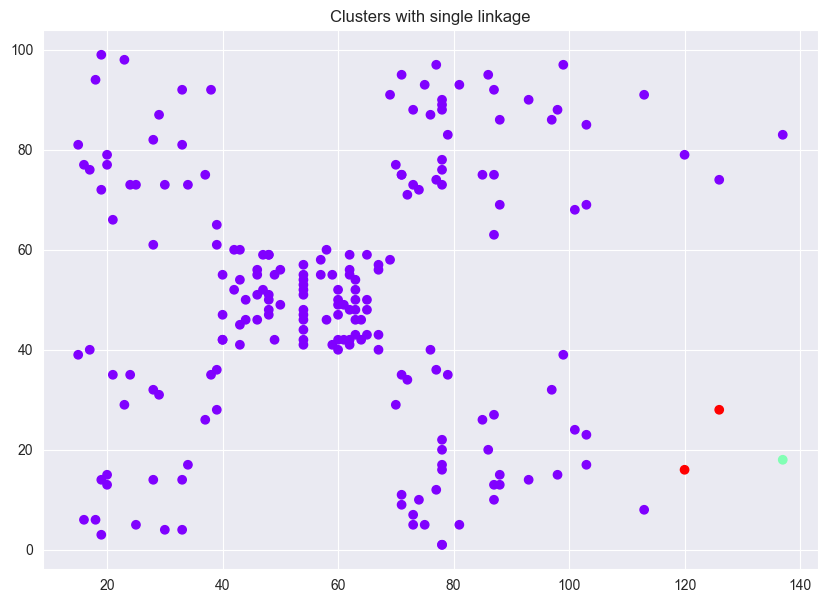

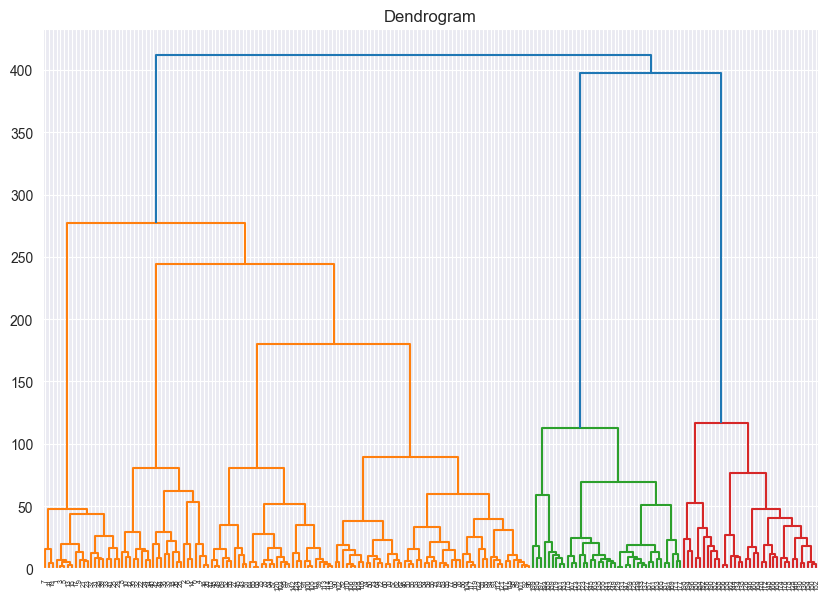

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram

X = customer_set[['Income', 'SpendingScore', 'Age']]

linkage_methods = ['ward', 'complete', 'average', 'single']

for linkage_method in linkage_methods:
    cluster = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    cluster.fit_predict(X)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(X['Income'], X['SpendingScore'], c=cluster.labels_, cmap='rainbow')
    plt.title(f'Clusters with {linkage_method} linkage')
    plt.show()

dist_matrix = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(dist_matrix)
plt.title('Dendrogram')
plt.show()

**Висновки з завдання 12 (детальні)**

1. 
2.   
3. ...

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

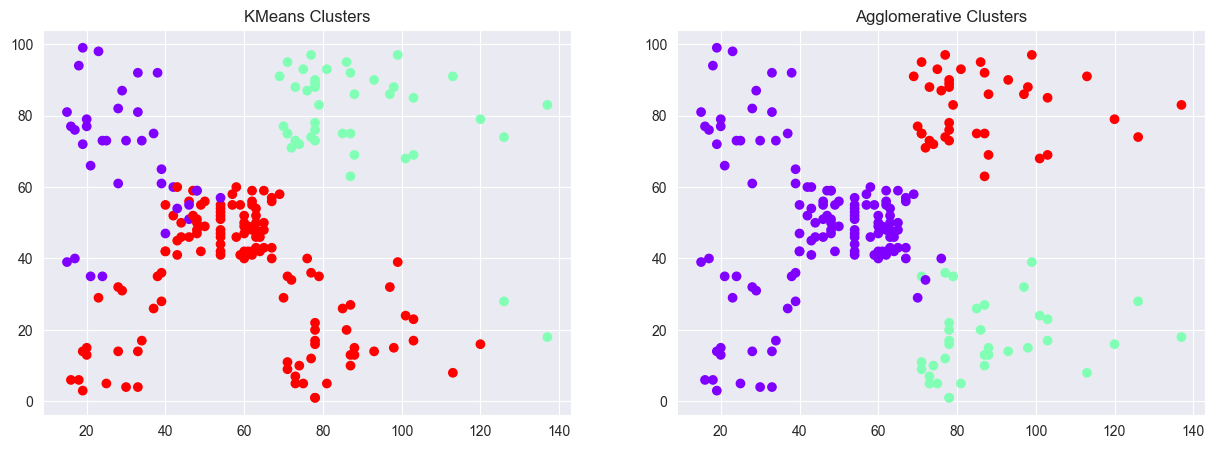

In [29]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters)
kmeans_labels = kmeans.fit_predict(X)

agglo = AgglomerativeClustering(n_clusters=optimal_clusters)
agglo_labels = agglo.fit_predict(X)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(X['Income'], X['SpendingScore'], c=kmeans_labels, cmap='rainbow')
axs[0].set_title('KMeans Clusters')

axs[1].scatter(X['Income'], X['SpendingScore'], c=agglo_labels, cmap='rainbow')
axs[1].set_title('Agglomerative Clusters')

plt.show()

**Висновки з завдання 13 (детальні)**

1. 
2.   
3. ...